<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

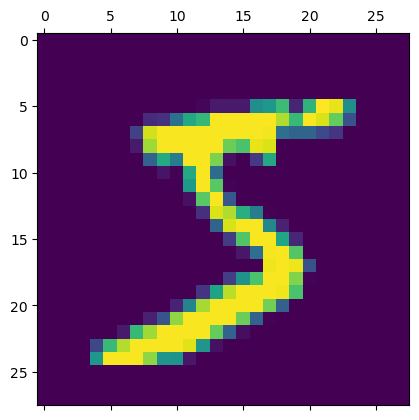

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/sgd", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6554 - accuracy: 0.8328
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3396 - accuracy: 0.9054
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2894 - accuracy: 0.9186
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2597 - accuracy: 0.9271
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2379 - accuracy: 0.9338


In [12]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [13]:
model.get_weights()

[array([[-0.02068099,  0.05164686,  0.06634352, ...,  0.04797077,
         -0.01728345, -0.02524962],
        [-0.00966996,  0.06272073,  0.06369182, ..., -0.0125916 ,
         -0.07716916,  0.08186667],
        [ 0.01118369,  0.02935497, -0.05377877, ...,  0.07404859,
          0.07508805, -0.04351237],
        ...,
        [ 0.0503933 , -0.00425532, -0.03112633, ...,  0.02797234,
          0.01815739, -0.01423325],
        [ 0.03918388,  0.05415587,  0.05621679, ..., -0.00329348,
         -0.00309647,  0.0480064 ],
        [ 0.00480709, -0.07275222,  0.07594779, ..., -0.06916955,
          0.04532731, -0.03049587]], dtype=float32),
 array([ 0.12266119,  0.12069177,  0.05114634, -0.05240274,  0.05807811,
         0.18378443,  0.06368983,  0.011978  ,  0.03677985,  0.05575556,
         0.12274718,  0.04863866,  0.08044386,  0.0110205 ,  0.04002638,
         0.07645528, -0.05067917,  0.03589953,  0.00680127,  0.11369646,
         0.00130166,  0.10780773,  0.03343962,  0.04148892, -0.009

In [14]:
%load_ext tensorboard
%tensorboard --logdir logs/fit